In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt


In [15]:
#question 1
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Adding new layer to the encoder
encoded_new = Dense(4, activation='relu')(encoded)
# Adding new layer to the decoder
decoded_new = Dense(encoding_dim, activation='sigmoid')(encoded_new)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy' ,metrics=['accuracy'])

Epoch 1/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6941 - accuracy: 0.0024 - val_loss: 0.6941 - val_accuracy: 0.0021
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6940 - accuracy: 0.0024 - val_loss: 0.6939 - val_accuracy: 0.0022
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6939 - accuracy: 0.0025 - val_loss: 0.6938 - val_accuracy: 0.0023
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6937 - accuracy: 0.0025 - val_loss: 0.6937 - val_accuracy: 0.0024
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6936 - accuracy: 0.0026 - val_loss: 0.6935 - val_accuracy: 0.0025


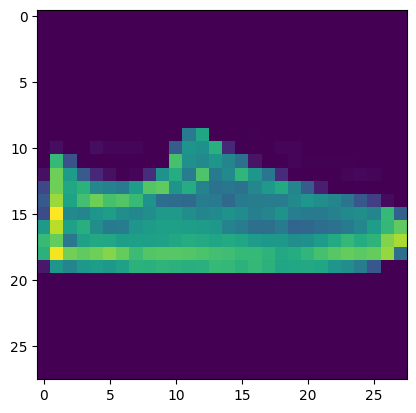

In [7]:
#question2
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#Visualize the data before reconstructed.
plt.imshow(x_test[12].reshape(28,28))
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history=autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


313/313 [==============================] - 0s 1ms/step


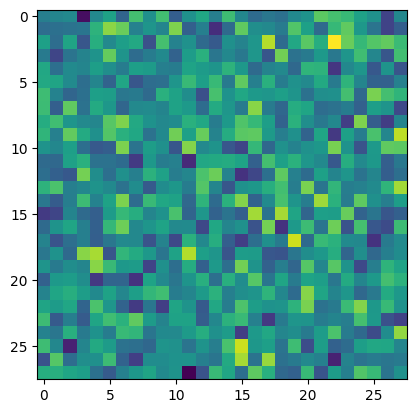

In [9]:
#After reconstructed version of that test data.
X_test = autoencoder.predict(x_test)
plt.imshow(X_test[12].reshape(28,28))

In [11]:
#question 3
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

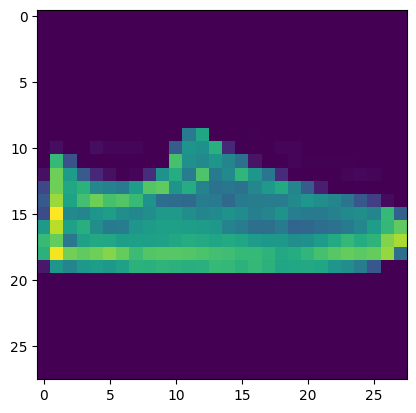

In [12]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
plt.imshow(x_test[12].reshape(28,28))


Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.6958 - val_loss: 0.6957
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6956 - val_loss: 0.6955
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6955 - val_loss: 0.6954
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6953 - val_loss: 0.6952
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6952 - val_loss: 0.6951
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6949 - val_loss: 0.6948
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6947 - val_loss: 0.6947
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 10/10
313/313 [==============================] - 0s 1ms/step


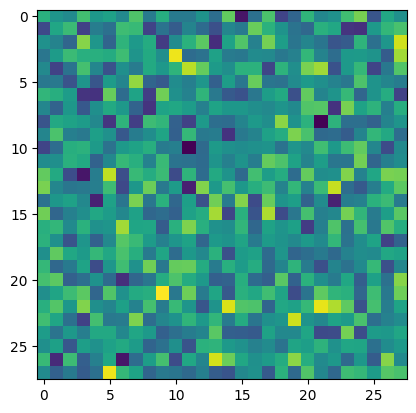

In [13]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

X_test = autoencoder.predict(x_test)
plt.imshow(X_test[12].reshape(28,28))

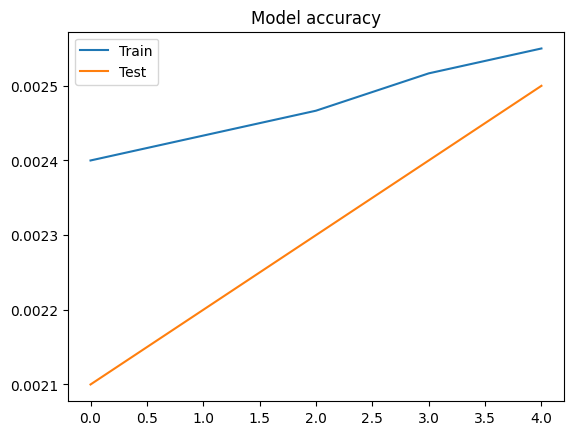

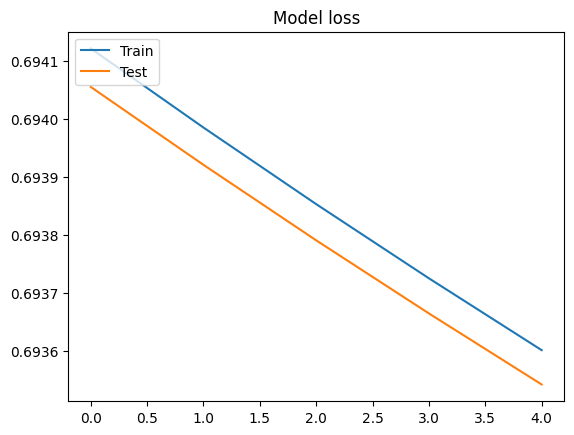

In [14]:
#question 4
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()